In [3]:
import os, sys, email
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize.regexp import RegexpTokenizer
from subprocess import check_output


In [58]:
df = pd.read_csv('C:/Users/User/Desktop/Python/final_project/emails.csv')
print(df.shape)
df

(517401, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [64]:
print(df['message'][5])

Message-ID: <30965995.1075863688265.JavaMail.evans@thyme>
Date: Thu, 31 Aug 2000 04:17:00 -0700 (PDT)
From: phillip.allen@enron.com
To: greg.piper@enron.com
Subject: Re: Hello
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Greg Piper
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

Greg,

 How about either next Tuesday or Thursday?

Phillip


In [65]:
def message_id(x):
    message_id = x.split('\n')[0]
    return message_id.split(':')[1]
df['Message-ID']=df['message'].apply(message_id)

In [66]:
def date(x):
    date=x.split('\n')[1]
    date = date.split(':')[1].split(',')[1]
    date=date[:-3]
    return date
df['Date']=df['message'].apply(date)

In [67]:
df.head(2)

,file,message,Message-ID,Date
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,14 May 2001
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,4 May 2001


In [68]:
def month(x):
    date=x.split('\n')[1]
    return date.split(':')[1].split(',')[1].split(' ')[2]
df['Month']=df['message'].apply(month)

In [69]:
def year(x):
    date=x.split('\n')[1]
    return date.split(':')[1].split(',')[1].split(' ')[3]
df['Year']=df['message'].apply(year)

In [70]:
def day(x):
    date=x.split('\n')[1]
    return date.split(':')[1].split(',')[0]
df['Day']=df['message'].apply(day)

In [71]:
def sender(x):
    sender=x.split('\n')[2]
    return sender.split(':')[1]
df['Sender_Email']=df['message'].apply(sender)

In [72]:
def receiver(x):
    receiver = x.split('\n')[3]
    return receiver.split(':')[1]
df['Receiver_Email']=df['message'].apply(receiver)

In [73]:
def subject(x):
    subject = x.split('\n')[4]
    return subject.split(':')[-1]
df['Subject']=df['message'].apply(subject)

In [74]:
def content_type(x):
    content_type=x.split('\n')[6]
    return content_type.split(':')[-1].split(';')[0]
df['Content-Type']=df['message'].apply(content_type)

In [75]:
def ascii_set(x):
    content_type=x.split('\n')[6]
    return content_type.split(':')[-1].split(';')[-1]
df['Char_Set']=df['message'].apply(ascii_set)

In [76]:
def x_from(x):
    x_from=x.split('\n')[8]
    return x_from.split(':')[-1]
df['Sender']=df['message'].apply(x_from)

In [77]:
def x_to(x):
    x_to=x.split('\n')[9]
    return x_to.split(':')[-1]
df['Receiver']=df['message'].apply(x_to)

In [78]:
def x_folder(x):
    x_folder = x.split('\n')[12]
    return x_folder.split(':')[-1]
df['Folder']=df['message'].apply(x_folder)

In [79]:
def x_origin(x):
    x_origin=x.split('\n')[13]
    return x_origin.split(':')[-1]
df['Origin']=df['message'].apply(x_origin)

In [80]:
def x_filename(x):
    x_filename=x.split('\n')[14]
    return x_filename.split(':')[-1]
df['File Name']=df['message'].apply(x_filename)

In [81]:
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

In [82]:
def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [83]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, df['message']))
df.drop('message', axis=1, inplace=True)
# Get fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    df[key] = [doc[key] for doc in messages]
# Parse content from emails
df['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
df['Sender_Email'] = df['Sender_Email'].map(split_email_addresses)
df['Receiver_Email'] = df['Receiver_Email'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
df['user'] = df['file'].map(lambda x:x.split('/')[0])
del messages

df.head(50)

,file,Message-ID,Date,Month,Year,Day,Sender_Email,Receiver_Email,Subject,Content-Type,...,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",May,2001,Mon,(phillip.allen@enron.com),(tim.belden@enron.com),,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",May,2001,Fri,(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Oct,2000,Wed,(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",Oct,2000,Mon,(phillip.allen@enron.com),(randall.gay@enron.com),,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Aug,2000,Thu,(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p
5,allen-p/_sent_mail/1002.,<30965995.1075863688265.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",Aug,2000,Thu,(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Greg,\n\n How about either next Tuesday or Thu...",allen-p
6,allen-p/_sent_mail/1003.,<16254169.1075863688286.JavaMail.evans@thyme>,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",Aug,2000,Tue,(phillip.allen@enron.com),"(david.l.johnson@enron.com, john.shafer@enron....",,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,"david.l.johnson@enron.com, John Shafer",,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Please cc the following distribution list with...,allen-p
7,allen-p/_sent_mail/1004.,<17189699.1075863688308.JavaMail.evans@thyme>,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",Jul,2000,Fri,(phillip.allen@enron.com),(joyce.teixeira@enron.com),Re: PRC review - phone calls,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,Joyce Teixeira,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,any morning between 10 and 11:30,allen-p
8,allen-p/_sent_mail/101.,<20641191.1075855687472.JavaMail.evans@thyme>,"Tue, 17 Oct 2000 02:26:00 -0700 (PDT)",Oct,2000,Tue,(phillip.allen@enron.com),(mark.scott@enron.com),Re: High Speed Internet Access,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,Mark Scott,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,1. login: pallen pw: ke9davis\n\n I don't thi...,allen-p
9,allen-p/_sent_mail/102.,<30795301.1075855687494.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06:44:00 -0700 (PDT)",Oct,2000,Mon,(phillip.allen@enron.com),(zimam@enron.com),FW: fixed forward or other Collar floor gas pr...,text/plain; charset=us-ascii,...,7bit,Phillip K Allen,zimam@enron.com,,,\Phillip_Allen_Dec2

In [85]:
print('shape of the dataframe:', df.shape)
# Find number of unique values in each columns
for col in df.columns:
    print(col, df[col].nunique())


shape of the dataframe: (517401, 29)
file 517401
Message-ID 517401
Date 224128
Month 12
Year 18
Day 7
Sender_Email 20328
Receiver_Email 53566
Subject 159290
Content-Type 2
Char_Set 24674
Sender 34817
Receiver 57173
Folder 37811
Origin 21627
File Name 21304
From 20328
To 58563
Mime-Version 1
Content-Transfer-Encoding 3
X-From 27980
X-To 73552
X-cc 33701
X-bcc 132
X-Folder 5335
X-Origin 259
X-FileName 429
content 249025
user 150


In [86]:
# Set index and drop columns with two few values
df = df.set_index('Message-ID').drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)
# Parse datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.dtypes

Date              object
Month             object
Year              object
Day               object
Sender_Email      object
Receiver_Email    object
Subject           object
Char_Set          object
Sender            object
Receiver          object
Folder            object
Origin            object
File Name         object
From              object
To                object
X-From            object
X-To              object
X-cc              object
X-bcc             object
X-Folder          object
X-Origin          object
X-FileName        object
content           object
user              object
dtype: object

In [99]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, utc=True)
df.dtypes

Date              datetime64[ns, UTC]
Month                          object
Year                           object
Day                            object
Sender_Email                   object
Receiver_Email                 object
Subject                        object
Char_Set                       object
Sender                         object
Receiver                       object
Folder                         object
Origin                         object
File Name                      object
From                           object
To                             object
X-From                         object
X-To                           object
X-cc                           object
X-bcc                          object
X-Folder                       object
X-Origin                       object
X-FileName                     object
content                        object
user                           object
dtype: object

Text(0, 0.5, 'N emails')

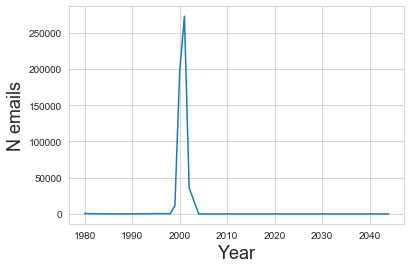

In [100]:
ax = df.groupby(df['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

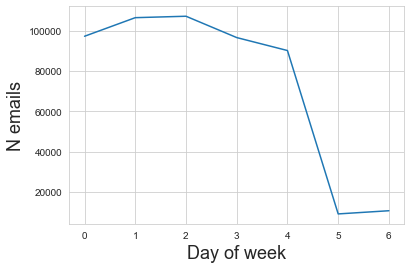

In [102]:
ax = df.groupby(df['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

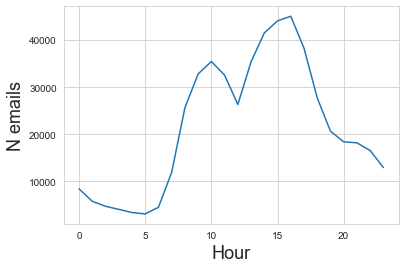

In [103]:
ax = df.groupby(df['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

In [26]:
# Count words in Subjects and content
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')
df['subject_wc'] = df['Subject'].map(lambda x: len(tokenizer.tokenize(x)))
df['content_wc'] = df['content'].map(lambda x: len(tokenizer.tokenize(x)))

In [27]:
grouped_by_people = df.groupby('user').agg({
        'content': 'count', 
        'subject_wc': 'mean',
        'content_wc': 'mean',
    })
grouped_by_people.rename(columns={'content_wc': 'Content word count',
                                  'content': 'N emails', 
                                  'subject_wc': 'Subject word count', 
                                  }, inplace=True)
grouped_by_people.sort_values(by='N emails', ascending=False).head()

,N emails,Subject word count,Content word count
user,,,
kaminski-v,28465,4.217530,255.906025
dasovich-j,28234,5.237373,603.393391
kean-s,25351,4.959331,490.837561
mann-k,23381,4.211796,207.195501
jones-t,19950,4.748221,185.462607


In [39]:
sub_df = df[['Sender_Email', 'Receiver_Email', 'Date']].dropna()
print(sub_df.shape)
# drop emails sending to multiple addresses
sub_df = sub_df.loc[sub_df['Receiver_Email'].map(len) == 1]
print(sub_df.shape)

(517401, 3)
(375761, 3)


In [40]:
sub_df.head()

,Sender_Email,Receiver_Email,Date
Message-ID,,,
<18782981.1075855378110.JavaMail.evans@thyme>,(phillip.allen@enron.com),(tim.belden@enron.com),2001-05-14 16:39:00-07:00
<15464986.1075855378456.JavaMail.evans@thyme>,(phillip.allen@enron.com),(john.lavorato@enron.com),2001-05-04 13:51:00-07:00
<24216240.1075855687451.JavaMail.evans@thyme>,(phillip.allen@enron.com),(leah.arsdall@enron.com),2000-10-18 03:00:00-07:00
<13505866.1075863688222.JavaMail.evans@thyme>,(phillip.allen@enron.com),(randall.gay@enron.com),2000-10-23 06:13:00-07:00
<30922949.1075863688243.JavaMail.evans@thyme>,(phillip.allen@enron.com),(greg.piper@enron.com),2000-08-31 05:07:00-07:00


In [41]:
sub_df = sub_df.groupby(['Sender_Email', 'Receiver_Email']).count().reset_index()

In [42]:
sub_df.head()

,Sender_Email,Receiver_Email,Date
0,(phillip.allen@enron.com),(tim.belden@enron.com),16
1,(phillip.allen@enron.com),(jeff.dasovich@enron.com),2
2,(phillip.allen@enron.com),(jedglick@hotmail.com),4
3,(phillip.allen@enron.com),(rbandekow@home.com),3
4,(phillip.allen@enron.com),(andy.zipper@enron.com),7


In [43]:
# Unpack frozensets
sub_df['Sender_Email'] = sub_df['Sender_Email'].map(lambda x: next(iter(x)))
sub_df['Receiver_Email'] = sub_df['Receiver_Email'].map(lambda x: next(iter(x)))
# rename column
sub_df.rename(columns={'Date': 'count'}, inplace=True)

In [44]:
sub_df.sort_values(by='count', ascending=False).head(10)

,Sender_Email,Receiver_Email,count
19494,pete.davis@enron.com,pete.davis@enron.com,9141
41920,vince.kaminski@enron.com,vkaminski@aol.com,4308
31625,enron.announcements@enron.com,all.worldwide@enron.com,2206
31639,enron.announcements@enron.com,all.houston@enron.com,1701
29178,kay.mann@enron.com,suzanne.adams@enron.com,1528
41917,vince.kaminski@enron.com,shirley.crenshaw@enron.com,1190
16347,steven.kean@enron.com,maureen.mcvicker@enron.com,1014
29118,kay.mann@enron.com,nmann@erac.com,980
19845,kate.symes@enron.com,evelyn.metoyer@enron.com,915
19839,kate.symes@enron.com,kerri.thompson@enron.com,859


In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [54]:
import wordcloud

(-0.5, 799.5, 599.5, -0.5)

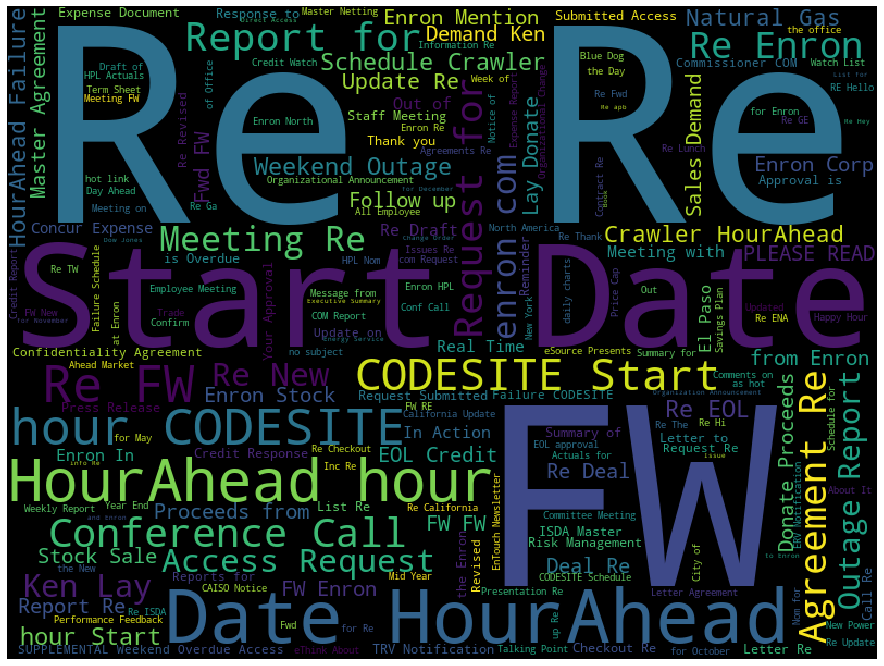

In [55]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

subjects = ' '.join(df['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

(-0.5, 799.5, 599.5, -0.5)

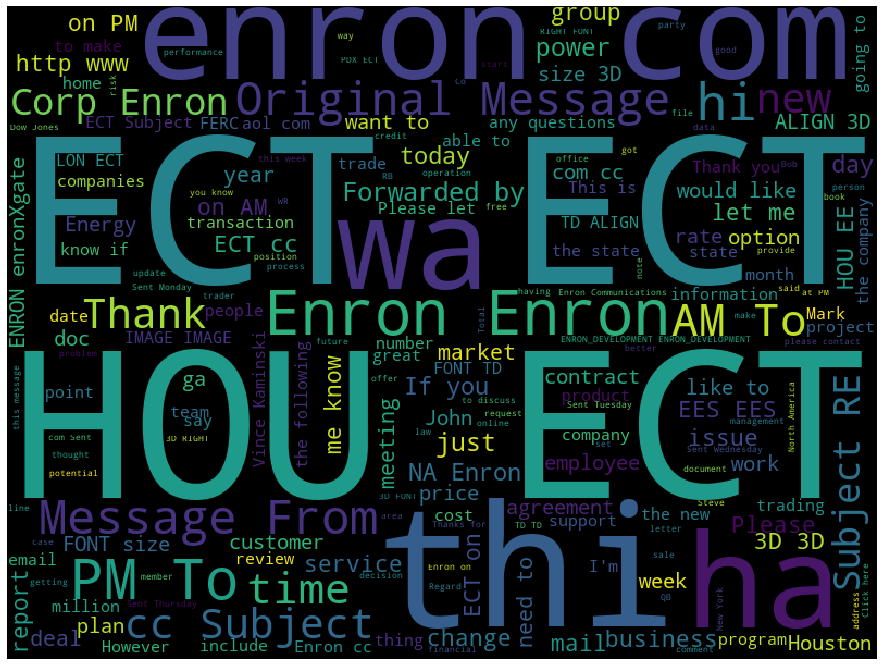

In [56]:
contents = ' '.join(df.sample(1000)['content'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(contents)
ax.imshow(wc)
ax.axis("off")

In [ ]:
df.head(5)